## Neural Network - Project - Part II

#### 1. Import data.

In [1]:
# Importing required libraries
import numpy as np       
import pandas as pd      

# read csv file with ";" as seprators
DB=pd.read_csv("Signal.csv",sep=",")  

# Display top 5 rows of the dataset
DB.head()  

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### 2. Data analysis & visualisation  

In [2]:
# Shape and size of data

print("Shape:",DB.shape)
print("\nColumns:",DB.shape[0])
print("\nRows:",DB.shape[1])
print("\nSize:",DB.size)

Shape: (1599, 12)

Columns: 1599

Rows: 12

Size: 19188


In [3]:
# Null value detection

DB.isna().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [4]:
# Nothing to pre-process as the data is devoid of null vallues

In [5]:
DB.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
CORRELATION=DB.corr()
CORRELATION

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
Parameter 2,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
Parameter 3,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
Parameter 4,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
Parameter 5,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
Parameter 6,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
Parameter 7,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
Parameter 8,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
Parameter 9,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
Parameter 10,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


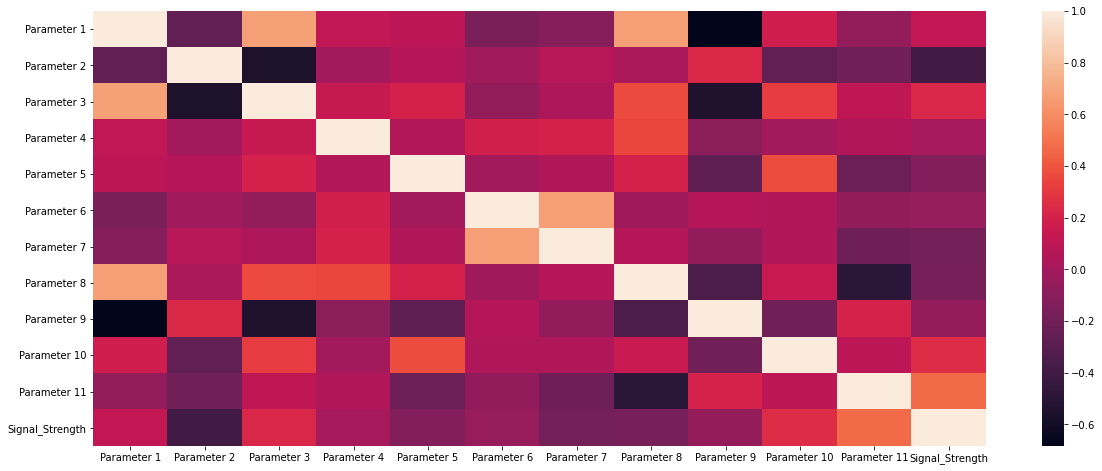

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(20,8))
sns.heatmap(CORRELATION)
plt.show()

 - Performing univariate, bivariate and multivariate analysis 

[0.07978419 0.0971146  0.08198794 0.07920675 0.07618029 0.07414144
 0.09951916 0.08524015 0.07581775 0.10049406 0.15051366]


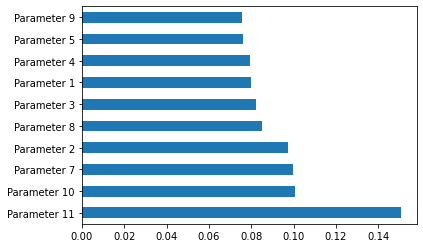

In [8]:
# Feature Importance

# Independent variables
X=DB.drop('Signal_Strength',axis=1) 

# Target variable
Y=DB['Signal_Strength']                   


from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)

#using inbuilt class "feature_importances" of tree based classifiers
print(model.feature_importances_) 

#ploting graph of feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#Observation: Most Effective - Parameter 11

#### 3. Designing, training, tuning and testing a neural network classifier. 

In [9]:
import sklearn
from sklearn.model_selection import train_test_split

# Independent variables
X=DB.drop('Signal_Strength',axis=1)

# Target variable
Y=DB['Signal_Strength']               

X_Train,X_Test,Y_Train,Y_Test=train_test_split(X, Y, train_size=0.7, random_state=12)

In [10]:
from sklearn.preprocessing import StandardScaler

# Scaling train data
X_Train_S = StandardScaler().fit_transform(X_Train) 

# Scaling test data
X_Test_S = StandardScaler().fit_transform(X_Test)     

In [11]:
# Converting y data into categorical (one-hot encoding)
from keras.utils.np_utils import to_categorical
Y_Train = to_categorical(Y_Train)
Y_Test = to_categorical(Y_Test)

Using TensorFlow backend.
/Users/krishnavdave/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/krishnavdave/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/krishnavdave/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/krishnavdave/opt

In [12]:
# Confirming Matrix size
print(X_Train_S.shape)
print(X_Test_S.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(1119, 11)
(480, 11)
(1119, 9)
(480, 9)


In [13]:
from keras.models import Sequential # Forward prop
from keras.layers import Dense, Activation, LeakyReLU
from keras import optimizers

In [14]:
NN_model_Classifier = Sequential()

# The Input Layer :
NN_model_Classifier.add(Dense(128, kernel_initializer='normal',input_dim = X_Train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_Classifier.add(Dense(64, kernel_initializer='normal',activation='relu'))  # sigmoid, tanh

NN_model_Classifier.add(Dense(32, kernel_initializer='normal'))
NN_model_Classifier.add(LeakyReLU(alpha=0.1))

NN_model_Classifier.add(Dense(16, kernel_initializer='normal'))
NN_model_Classifier.add(LeakyReLU(alpha=0.1))


# The Output Layer :
NN_model_Classifier.add(Dense(9, kernel_initializer='normal',activation='softmax'))  # except softmax

# Compile the network :
NN_model_Classifier.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
NN_model_Classifier.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1536      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 153       
Total 

In [15]:
EPOCH=400
Network_Classifier=NN_model_Classifier.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=EPOCH, batch_size=200)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Train on 1119 samples, validate on 480 samples
Epoch 1/400
1119/1119 [==============================] - 0s - loss: 0.1974 - acc: 0.4209 - val_loss: 0.1972 - val_acc: 0.4354
Epoch 2/400
1119/1119 [==============================] - 0s - loss: 0.1971 - acc: 0.4218 - val_loss: 0.1967 - val_acc: 0.4354
Epoch 3/400
1119/1119 [==============================] - 0s - loss: 0.1963 - acc: 0.4218 - val_loss: 0.1954 - val_acc: 0.4354
Epoch 4/400
1119/1119 [==============================] - 0s - loss: 0.1946 - acc: 0.4218 - val_loss: 0.1923 - val_acc: 0.4354
Epoch 5/400
1119/1119 [==============================] - 0s - loss: 0.1901 - acc: 0.4218 - val_loss: 0.1841 - val_acc: 0.4354
Epoch 6/400
1119/1119 [==============================] - 0s - loss: 0.1783 - acc: 0.4218 - val_loss: 0.1639 - val_acc: 0.4354
Epoch 7/400
1119/1119 [==============================] - 0s - loss: 0.1538 - 

1119/1119 [==============================] - 0s - loss: 0.0861 - acc: 0.6184 - val_loss: 0.0859 - val_acc: 0.6146
Epoch 60/400
1119/1119 [==============================] - 0s - loss: 0.0859 - acc: 0.6193 - val_loss: 0.0859 - val_acc: 0.6167
Epoch 61/400
1119/1119 [==============================] - 0s - loss: 0.0857 - acc: 0.6211 - val_loss: 0.0857 - val_acc: 0.6146
Epoch 62/400
1119/1119 [==============================] - 0s - loss: 0.0856 - acc: 0.6211 - val_loss: 0.0855 - val_acc: 0.6125
Epoch 63/400
1119/1119 [==============================] - 0s - loss: 0.0855 - acc: 0.6193 - val_loss: 0.0859 - val_acc: 0.6104
Epoch 64/400
1119/1119 [==============================] - 0s - loss: 0.0855 - acc: 0.6247 - val_loss: 0.0856 - val_acc: 0.6167
Epoch 65/400
1119/1119 [==============================] - 0s - loss: 0.0856 - acc: 0.6193 - val_loss: 0.0851 - val_acc: 0.6146
Epoch 66/400
1119/1119 [==============================] - 0s - loss: 0.0857 - acc: 0.6193 - val_loss: 0.0855 - val_acc: 0.61

1119/1119 [==============================] - 0s - loss: 0.0810 - acc: 0.6363 - val_loss: 0.0853 - val_acc: 0.6146
Epoch 188/400
1119/1119 [==============================] - 0s - loss: 0.0809 - acc: 0.6372 - val_loss: 0.0838 - val_acc: 0.6229
Epoch 189/400
1119/1119 [==============================] - 0s - loss: 0.0810 - acc: 0.6363 - val_loss: 0.0844 - val_acc: 0.6208
Epoch 190/400
1119/1119 [==============================] - 0s - loss: 0.0808 - acc: 0.6372 - val_loss: 0.0846 - val_acc: 0.6208
Epoch 191/400
1119/1119 [==============================] - 0s - loss: 0.0809 - acc: 0.6363 - val_loss: 0.0838 - val_acc: 0.6250
Epoch 192/400
1119/1119 [==============================] - 0s - loss: 0.0808 - acc: 0.6372 - val_loss: 0.0845 - val_acc: 0.6208
Epoch 193/400
1119/1119 [==============================] - 0s - loss: 0.0808 - acc: 0.6372 - val_loss: 0.0850 - val_acc: 0.6146
Epoch 194/400
1119/1119 [==============================] - 0s - loss: 0.0807 - acc: 0.6372 - val_loss: 0.0848 - val_ac

1119/1119 [==============================] - 0s - loss: 0.0806 - acc: 0.6372 - val_loss: 0.0843 - val_acc: 0.6208
Epoch 316/400
1119/1119 [==============================] - 0s - loss: 0.0806 - acc: 0.6372 - val_loss: 0.0842 - val_acc: 0.6208
Epoch 317/400
1119/1119 [==============================] - 0s - loss: 0.0806 - acc: 0.6372 - val_loss: 0.0842 - val_acc: 0.6208
Epoch 318/400
1119/1119 [==============================] - 0s - loss: 0.0806 - acc: 0.6372 - val_loss: 0.0842 - val_acc: 0.6208
Epoch 319/400
1119/1119 [==============================] - 0s - loss: 0.0806 - acc: 0.6372 - val_loss: 0.0842 - val_acc: 0.6208
Epoch 320/400
1119/1119 [==============================] - 0s - loss: 0.0806 - acc: 0.6372 - val_loss: 0.0842 - val_acc: 0.6208
Epoch 321/400
1119/1119 [==============================] - 0s - loss: 0.0806 - acc: 0.6372 - val_loss: 0.0842 - val_acc: 0.6208
Epoch 322/400
1119/1119 [==============================] - 0s - loss: 0.0806 - acc: 0.6372 - val_loss: 0.0842 - val_ac

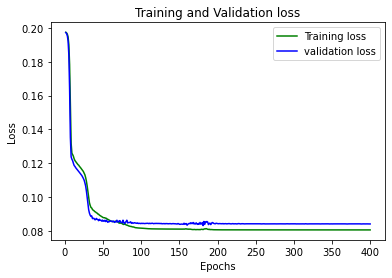

In [16]:
loss_train = Network_Classifier.history['loss']
loss_val = Network_Classifier.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

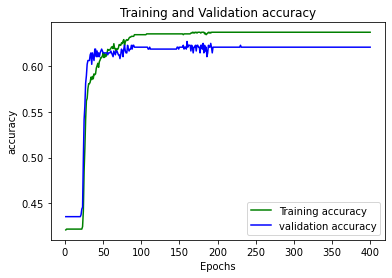

In [17]:
Acc_train = Network_Classifier.history['acc']
Acc_val = Network_Classifier.history['val_acc']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#### 4. Pickle the model for future use. 

In [20]:
from keras.models import model_from_json
import numpy
import os

# Pickle model to JSON
Classifier_model_json = NN_model_Classifier.to_json()
with open("Classifier_model.json", "w") as json_file:
    json_file.write(Classifier_model_json)
# Pickle weights to HDF5
NN_model_Classifier.save_weights("Classifier_model.h5")
print("Saved model to disk")


# load json and create model
json_file = open('Classifier_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Classifier_model.h5")
print("Loaded model from disk")

# Evaluate
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_Test_S,Y_Test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk
Instructions for updating:
keep_dims is deprecated, use keepdims instead
acc: 62.08%
